In [11]:
import numpy as np
import pandas as pd
import tensorflow as tf
#import cv2
import datetime
import os

import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras import layers, models
from tensorflow.keras.layers import LeakyReLU
#from keras.optimizers import Adam
#from keras.callbacks import ReduceLROnPlateau
from keras.regularizers import l1, l2, l1_l2
#from keras.layers.normalization import BatchNormalization
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [4]:
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [5]:
leaky_relu_alpha = 0.1

In [7]:
train_dataset = image_dataset_from_directory(r"C:\Users\adhim\Desktop\Jowar Compressed Segemented\CompressedSegmented4\Train",
                                          image_size = (250, 250),
                                          batch_size = 32,
                                          shuffle = True
                                          )  

Found 368 files belonging to 3 classes.


In [8]:
val_dataset = image_dataset_from_directory( r"C:\Users\adhim\Desktop\Jowar Compressed Segemented\CompressedSegmented4\Validation",
                                                image_size = (250, 250),
                                                batch_size = 32,
                                                shuffle = True)

Found 158 files belonging to 3 classes.


In [19]:
model1 = models.Sequential()

model1.add(layers.experimental.preprocessing.RandomFlip('horizontal'))

model1.add(layers.experimental.preprocessing.RandomRotation(0.2))

model1.add(layers.Conv2D(filters = 16, kernel_size = (3, 3), padding = 'same', activation = 'relu', input_shape = (250, 250, 3)))
model1.add(layers.Conv2D(filters = 16, kernel_size = (3, 3), padding = 'same', activation = LeakyReLU( alpha = leaky_relu_alpha)))

model1.add(layers.MaxPooling2D( pool_size = 2, strides = 2))

model1.add(layers.Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same', activation = 'relu'))
model1.add(layers.Conv2D(filters = 32, kernel_size = (3, 3), padding = "same", activation = LeakyReLU( alpha = leaky_relu_alpha)))

model1.add(layers.MaxPooling2D(pool_size = 2, strides = 2 ))

model1.add(layers.Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same', activation = 'relu'))
model1.add(layers.Conv2D(filters = 64, kernel_size = (3, 3), padding = "same", activation = LeakyReLU( alpha = leaky_relu_alpha)))

model1.add(layers.MaxPooling2D(pool_size = 2, strides = 2 ))

In [20]:
model1.add(layers.Flatten())

model1.add(layers.Dense(128, kernel_regularizer = l2(0.001), activation =  LeakyReLU( alpha = leaky_relu_alpha)))

model1.add(layers.Dense(64, kernel_regularizer = l2(0.001), activation =  LeakyReLU( alpha = leaky_relu_alpha)))

model1.add(layers.Dense(32, kernel_regularizer = l2(0.001), activation =  LeakyReLU( alpha = leaky_relu_alpha)))

model1.add(layers.Dense(16, activation = 'relu'))

model1.add(layers.Dropout(0.25))

model1.add(layers.Dense(1, activation = "softmax"))

In [13]:
checkpoint_path = 'training_1/cp.ckpt'

checkpoint_dir = os.path.dirname(checkpoint_path)

In [14]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_path,
                                                 save_weights_only = True,
                                                 verbose = 1)

In [15]:
model1.compile(loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy'],
               optimizer = tf.keras.optimizers.Adam())

In [17]:
train_dataset

<BatchDataset shapes: ((None, 250, 250, 3), (None,)), types: (tf.float32, tf.int32)>

In [16]:
history = model1.fit(train_dataset,
                     batch_size = 32,
                     epochs = 50,
                     validation_data = val_dataset,
                     callbacks = [cp_callback]
                     )

Epoch 1/50


InvalidArgumentError:  Received a label value of 2 which is outside the valid range of [0, 2).  Label values: 2 1 1 2 1 1 1 0 0 1 1 2 1 1 2 0 2 2 1 1 0 1 0 0 1 1 1 0 2 1 2 1
	 [[node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits (defined at <ipython-input-16-8af0d60bf87a>:1) ]] [Op:__inference_train_function_1910]

Function call stack:
train_function


In [22]:
loss = history.history['loss']

accuracy = history.history['accuracy']

val_loss = history.history['val_loss']

val_accuracy = history.history['val_accuracy']

In [23]:
!mkdir -new user_model

model1.save('user_model/self_designed_model')

A subdirectory or file -new already exists.
Error occurred while processing: -new.
A subdirectory or file user_model already exists.
Error occurred while processing: user_model.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: user_model/self_designed_model\assets


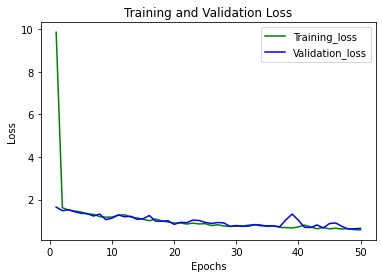

In [26]:
epochs = range(1, 51)

plt.plot(epochs, loss, 'g', label = 'Training_loss')

plt.plot(epochs, val_loss, 'b', label = 'Validation_loss')

plt.title('Training and Validation Loss')

plt.xlabel('Epochs')

plt.ylabel('Loss')

plt.legend()

plt.savefig('Loss.png')

plt.show()

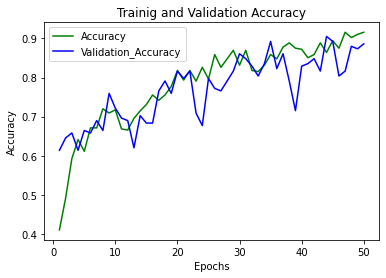

In [28]:
plt.plot(epochs, accuracy, 'g', label = 'Accuracy')

plt.plot(epochs, val_accuracy, 'b', label = 'Validation_Accuracy')

plt.title('Trainig and Validation Accuracy')

plt.xlabel('Epochs')

plt.ylabel('Accuracy')

plt.legend()

plt.savefig('Accuracy.png')

plt.show()

## Testing

In [ ]:
Anthracnose_leaf = mpimg.imread("/content/drive/MyDrive/6 (73).jpg")

Healthy_leaf = mpimg.imread("/content/drive/MyDrive/Healthy.jpg")

Leaf_Blight_leaf = mpimg.imread("/content/drive/MyDrive/LB1.jpg")

In [6]:
train_set = image_dataset_from_directory("C:\\Users\\adhim\\Desktop\\CompressedSegmented4\\Train",
                                             image_size = (250, 250),
                                              batch_size = 32,
                                              shuffle = True
                                          )

Found 368 files belonging to 3 classes.


In [7]:
val_set = image_dataset_from_directory( "C:\\Users\\adhim\\Desktop\\CompressedSegmented4\\Validation",
                                            image_size = (250, 250),
                                            batch_size = 32,
                                            shuffle = True
                                          )

Found 158 files belonging to 3 classes.


## Model 2

In [122]:
model2 = models.Sequential()

model2.add(layers.experimental.preprocessing.RandomFlip('horizontal'))

model2.add(layers.experimental.preprocessing.RandomRotation(0.2))


model2.add(layers.Conv2D(filters = 16, kernel_size = (3, 3), padding = 'same', activation = 'relu', input_shape = (250, 250, 3)))
model2.add(layers.Conv2D(filters = 16, kernel_size = (3, 3), padding = 'same', activation = LeakyReLU( alpha = leaky_relu_alpha)))

model2.add(layers.MaxPooling2D( pool_size = 2, strides = 2))

model2.add(layers.Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same', activation = 'relu'))
model2.add(layers.Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same', activation = LeakyReLU( alpha = leaky_relu_alpha)))

model2.add(layers.MaxPooling2D(pool_size = 2, strides = 2 ))

model2.add(layers.Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same', activation = 'relu'))
model2.add(layers.Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same', activation = LeakyReLU( alpha = leaky_relu_alpha)))

model2.add(layers.MaxPooling2D(pool_size = 2, strides = 2 ))

In [123]:
model2.add(layers.Flatten())

model2.add(layers.Dense(128, kernel_regularizer = l2(0.001), activation =  'relu'))

model2.add(layers.Dense(64, kernel_regularizer = l2(0.001), activation =  'relu'))

model2.add(layers.Dense(32, kernel_regularizer = l2(0.001), activation =  'relu'))

model2.add(layers.Dense(16, kernel_regularizer = l2(0.001), activation = 'relu'))

model2.add(layers.Dropout(0.25))

model2.add(layers.Dense(3, activation = "softmax"))

In [124]:
checkpoint_path = 'training_2/cp.ckpt'

checkpoint_dir = os.path.dirname(checkpoint_path)

In [125]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(
                                                 filepath = checkpoint_path,
                                                 save_weights_only = True,
                                                 verbose = 1
                                                 )

In [126]:
model2.compile(loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy'],
               optimizer = tf.keras.optimizers.Adam())

In [127]:
history = model2.fit(train_set,
                     batch_size = 32,
                     epochs = 30,
                     validation_data = val_set,
                     callbacks = [cp_callback]
                     )

Epoch 1/30
12/12 [==============================] - ETA: 0s - loss: 2.0669 - accuracy: 0.4891
Epoch 00001: saving model to training_2\cp.ckpt
12/12 [==============================] - 3s 282ms/step - loss: 2.0669 - accuracy: 0.4891 - val_loss: 1.4393 - val_accuracy: 0.6266
Epoch 2/30
12/12 [==============================] - ETA: 0s - loss: 1.4388 - accuracy: 0.5761
Epoch 00002: saving model to training_2\cp.ckpt
12/12 [==============================] - 3s 217ms/step - loss: 1.4388 - accuracy: 0.5761 - val_loss: 1.3915 - val_accuracy: 0.5823
Epoch 3/30
12/12 [==============================] - ETA: 0s - loss: 1.3786 - accuracy: 0.5761
Epoch 00003: saving model to training_2\cp.ckpt
12/12 [==============================] - 3s 216ms/step - loss: 1.3786 - accuracy: 0.5761 - val_loss: 1.2675 - val_accuracy: 0.6392
Epoch 4/30
12/12 [==============================] - ETA: 0s - loss: 1.3208 - accuracy: 0.6060
Epoch 00004: saving model to training_2\cp.ckpt
12/12 [==============================] 